## Part III: Visualising sequence similarity

In [6]:
!pip install logomaker


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [7]:
# load libraries

from utils import *
from sequence_alignment_viewer import *
from build_tree import *

from Bio.Seq import Seq

import logomaker


In [8]:
# DNA sequences

seq_length = 40

seq1 = random_DNA(length=seq_length)
print("DNA sequence of our ancestor: " + seq1)

sequences = {'Ancestor': seq1}  
for i in range(10):
    sequences['mutant_' + str(i)] = mutate_n(seq1, 10)

p = view_alignment(sequences, language='DNA', plot_width=1000)
pn.pane.Bokeh(p)

DNA sequence of our ancestor: TTCCTGAGTGTACCCTGATAGAAACAGAGGTACCAGAACG


BokehModel(combine_events=True, render_bundle={'docs_json': {'6e096d40-1b7b-4be6-bf5f-7ab85a27eace': {'version…

In [9]:
# protein sequences

sequences_protein = {name: str(Seq(seq).translate()) for name, seq in sequences.items()}
sequences_protein

p = view_alignment(sequences_protein, language='protein', plot_width=800)
pn.pane.Bokeh(p)

/Users/wheelern/miniconda3/lib/python3.10/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


BokehModel(combine_events=True, render_bundle={'docs_json': {'f187131f-2dcd-42a1-abb6-09c80843f447': {'version…

In [25]:
clrs =  {'A':'red','L':'red','I':'red','V':'red','M':'red','F':'red','Y':'red','W':'red', # hydrophobic
                 'H':'blue','K':'blue','R':'blue', # basic
                 'D':'green','E':'green', # acidic
                 'S':'orange','T':'orange','N':'orange','Q':'orange', # polar
                 'C':'pink','U':'pink','G':'pink','P':'pink', # special cases
                 '-':'white', '*':'black'}

We can use our sequences to create a 'sequence profile', which captures which amino acids are likely to be seen at each position in the protein. This is a useful way to visualize the conservation of different amino acids in a protein family. 

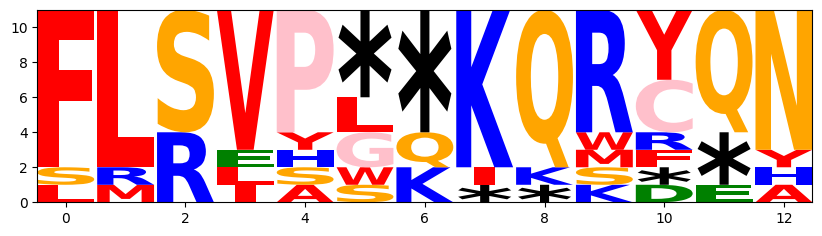

In [26]:
# We can use the logomaker library to create a sequence profile for our protein sequences

seqs = list(sequences_protein.values())
ars_df = logomaker.alignment_to_matrix(seqs)
ars_logo = logomaker.Logo(ars_df, color_scheme=clrs)
